# Лабораторная работа №2: Реализация дискриминантного анализа

## Импорт необходимых библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Подготовка исходных данных

Исходные данные для дискриминантного анализа:
- X1 - первая группа данных (4 точки)
- X2 - вторая группа данных (5 точек)
- X0 - тестовые данные для классификации (3 точки)

In [2]:
X1 = np.array([[224.228, 17.115, 22.981], [151.827, 14.904, 21.481], 
               [147.313, 13.627, 18.669], [152.253, 10.545, 10.199]])
X2 = np.array([[46.757, 4.428, 11.124], [29.033, 5.510, 6.091], 
               [52.134, 4.214, 11.842], [37.050, 5.527, 11.873], 
               [63.979, 4.211, 12.860]])
X0 = np.array([[55.451, 9.592, 12.840], [78.575, 11.727, 15.535], 
               [98.353, 17.572, 20.458]])

## Шаг 1: Вычисление средних значений

Вычисляем средние значения для каждой группы данных

In [3]:
X11, X21 = np.mean(X1, axis=0), np.mean(X2, axis=0)
n1, m = X1.shape[0], X1.shape[1]  # n1 - количество точек в первой группе
n2 = X2.shape[0]  # n2 - количество точек во второй группе

## Шаг 2: Вычисление ковариационных матриц

Используем смещенную ковариацию (bias=True) для соответствия с Mathcad

In [4]:
S1 = np.cov(X1.T, bias=True)  # Ковариационная матрица первой группы
S2 = np.cov(X2.T, bias=True)  # Ковариационная матрица второй группы

## Шаг 3: Вычисление общей ковариационной матрицы

In [5]:
S = (n1 * S1 + n2 * S2) / (n1 + n2 - 2)

## Шаг 4: Вычисление обратной матрицы и дискриминантной функции

In [6]:
S0 = np.linalg.inv(S)  # Обратная матрица
A = S0 @ (X11 - X21)   # Коэффициенты дискриминантной функции

## Шаг 5: Вычисление проекций точек на дискриминантную ось

In [7]:
F1 = X1 @ A  # Проекции первой группы
F2 = X2 @ A  # Проекции второй группы
F0 = X0 @ A  # Проекции тестовых точек

## Шаг 6: Вычисление порога классификации

In [8]:
M1, M2 = np.mean(F1), np.mean(F2)  # Средние значения проекций
F_threshold = 0.5 * (M1 + M2)      # Порог классификации

## Шаг 7: Подготовка данных для визуализации

In [9]:
FF = np.concatenate([F1, F2, F0]) - F_threshold  # Центрированные проекции
d = np.arange(1, len(FF)+1)  # Индексы точек
B = np.column_stack([d, FF])  # Матрица для вывода результатов

## Шаг 8: Визуализация результатов

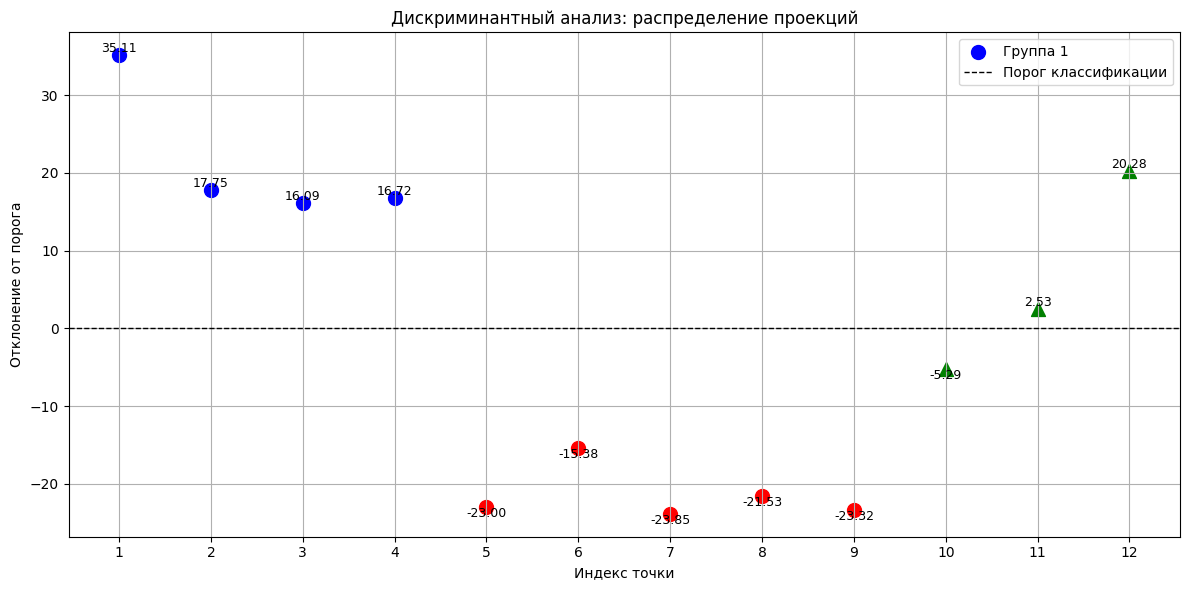

In [10]:
plt.figure(figsize=(12, 6))
colors = ['blue']*n1 + ['red']*n2 + ['green']*len(F0)  # Цвета для разных групп
labels = ['Группа 1']*n1 + ['Группа 2']*n2 + ['X0']*len(F0)

# Построение точечного графика с подписями значений
for i, (x, y, color, label) in enumerate(zip(d, FF, colors, labels)):
    plt.scatter(x, y, color=color, label=label if i == 0 else "", 
                s=100, marker='o' if color != 'green' else '^')
    plt.text(x, y, f'{y:.2f}', ha='center', 
             va='bottom' if y > 0 else 'top', fontsize=9)

# Добавление пороговой линии и оформление графика
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, 
            label='Порог классификации')
plt.title('Дискриминантный анализ: распределение проекций')
plt.xlabel('Индекс точки')
plt.ylabel('Отклонение от порога')
plt.xticks(d)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Шаг 9: Вывод результатов в виде таблицы

In [11]:
print("\nРезультаты классификации:")
print("   d      FF")
for row in B:
    print(f"{int(row[0]):3d}  {row[1]:10.3f}")


Результаты классификации:
   d      FF
  1      35.110
  2      17.753
  3      16.086
  4      16.720
  5     -22.997
  6     -15.385
  7     -23.851
  8     -21.535
  9     -23.320
 10      -5.287
 11       2.531
 12      20.284
